The objective of this exercise is to explore relationships between variables in the cleaned dataset using visual analysis techniques. 

Content of the script:

In [3]:
# Step 1: Setting up a Jupyter notebook with visualization libraries, 
# and importing the cleaned dataset.

# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# setting the path to get the file

file = '/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A6/1_sourceing_open_data/US project/Data/Output data/6.2/final_merged_dataset_output_6.1_v4_imputed.csv'

# reading the file
df = pd.read_csv(file)

# checing the file 

df.head(5)

,FIPS,State,County,air_pollution__air_pollution_2020,air_pollution__air_pollution_2021,air_pollution__air_pollution_2022,air_pollution__air_pollution_2023,air_pollution__air_pollution_2024,air_pollution__air_pollution_mean,children_lunch__children_lunch_2020,...,fmr_0_2022,fmr_1_2022,fmr_2_2022,fmr_3_2022,fmr_4_2022,fmr_0_2024,fmr_1_2024,fmr_2_2024,fmr_3_2024,fmr_4_2024
0,1001,AL,Autauga County,11.7,10.4,9.5,10.0,10.0,10.32,0.434087,...,643.0,764.0,914.0,1156.0,1494.0,836.0,913.0,1092.0,1383.0,1753.0
1,1003,AL,Baldwin County,10.3,7.2,7.2,7.6,7.6,7.98,0.484866,...,772.0,777.0,1017.0,1348.0,1715.0,1051.0,1056.0,1362.0,1670.0,2114.0
2,1005,AL,Barbour County,11.5,9.4,9.0,9.4,9.4,9.74,0.632923,...,532.0,536.0,705.0,871.0,980.0,652.0,656.0,857.0,1089.0,1141.0
3,1007,AL,Bibb County,11.2,10.0,9.4,9.8,9.8,10.04,0.615621,...,765.0,820.0,943.0,1220.0,1316.0,983.0,1109.0,1245.0,1570.0,1752.0
4,1009,AL,Blount County,11.7,10.6,9.4,9.6,9.6,10.18,0.529063,...,765.0,820.0,943.0,1220.0,1316.0,983.0,1109.0,1245.0,1570.0,1752.0


In [4]:
# checing file for duplicates

if df.duplicated().sum() == 0:
    print("No duplicated rows.")
else:
    print(f"Found {df.duplicated().sum()} duplicated rows.")

# and missted values

if df.isnull().sum().sum()==0:
    print("No missed value.")
else:
    print(f"Found {df.isnull().sum().sum()} missed values. Investigate futher.")

No duplicated rows.
No missed value.


In [5]:
# Step 2: Selecting relevant variables based on research questions,
# and discarding irrelevant ones (e.g., ID, date, index).

Question to discover: 

1. Can we predict healthcare access based on median income, child poverty rates, and population characteristics(like diversity index)?

For that purpose, the following variables (mean values of 5 years, from 2020 to 2024) will be utilized:

🏥 Healthcare Access & Resources
1. Uninsured Rate
2. Primary Care Physicians per Capita
3. Mental Health Providers per Capita
4. Dentists per Capita
5. Flu Vaccination Rate
6. Mammography Screening Rate
   
💡 Social & Economic Predictors
7. Median Household Income
8. Child Poverty Rate
9. Unemployment Rate
10. Income Inequality
11. Diversity index

🌍 Environmental & Lifestyle Factors
12. Access to Exercise Opportunities
13. Food Insecurity Rate


In [7]:
# To do that we are going to create sub dataset using the following columns 

# Step 2: Selecting 13 relevant variables in a meaningful sequence

selected_columns = [
    # 🏥 Healthcare Access & Resources
    "uninsured_raw_value__uninsured_mean",
    "primary_care_physicians__primary_care_physicians_mean",
    "mental_health_providers_raw_val__mental_health_providers_mean",
    "dentists_raw_value__dentists_mean",
    "flu_vaccinations_raw_value__flu_vaccinations_mean",
    "mammography_screening__mammography_screening_mean",

    # 💡 Social & Economic Predictors
    "median_income__median_income_mean",
    "children_poverty__children_poverty_mean",
    "unemployment__unemployment_mean",
    "income_inequality__income_inequality_mean",
    "Diversity Index",

    # 🌍 Environmental & Lifestyle Factors
    "exercise_access__exercise_access_mean",
    "food_insecurity__food_insecurity_mean"
]

df_healthcare_predictors = df[selected_columns].rename(columns={
    "uninsured_raw_value__uninsured_mean": "Uninsured",
    "primary_care_physicians__primary_care_physicians_mean": "PC Physicians",
    "mental_health_providers_raw_val__mental_health_providers_mean": "Mental Health",
    "dentists_raw_value__dentists_mean": "Dentists",
    "flu_vaccinations_raw_value__flu_vaccinations_mean": "Flu Vaccination",
    "mammography_screening__mammography_screening_mean": "Mammography",
    "median_income__median_income_mean": "Median Income",
    "children_poverty__children_poverty_mean": "Child Poverty",
    "unemployment__unemployment_mean": "Unemployment",
    "income_inequality__income_inequality_mean": "Income Inequality",
    "Diversity Index": "Diversity Index",
    "exercise_access__exercise_access_mean": "Exercise Access",
    "food_insecurity__food_insecurity_mean": "Food Insecurity"
})


df_healthcare_predictors.reset_index(drop=True, inplace=True)

df_healthcare_predictors.head()

,Uninsured,PC Physicians,Mental Health,Dentists,Flu Vaccination,Mammography,Median Income,Child Poverty,Unemployment,Income Inequality,Diversity Index,Exercise Access,Food Insecurity
0,0.097396,0.000450,0.000324,0.000325,0.408,0.400,64345.6,0.1638,0.032656,4.978505,0.416657,0.622097,0.1446
1,0.114562,0.000680,0.001018,0.000485,0.450,0.426,65191.2,0.1446,0.034521,4.394508,0.304044,0.701601,0.1242
2,0.131568,0.000346,0.000194,0.000347,0.374,0.436,37804.0,0.3904,0.051598,5.683145,0.582503,0.531738,0.2038
3,0.112373,0.000580,0.000332,0.000242,0.346,0.354,49530.4,0.2602,0.039315,5.093892,0.392390,0.209419,0.1540
4,0.135645,0.000213,0.000195,0.000182,0.394,0.350,55192.8,0.1808,0.029745,4.607747,0.195074,0.274709,0.1326


In [8]:
import os
import pandas as pd

#DataFrame
#df_healthcare_predictors

# Define folder and filename
folder = "/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A6/7_Tableau_Dashboard"
filename = "tag_cloud_data.csv"

# Join path
file_path = os.path.join(folder, filename)

# Export CSV
df_healthcare_predictors.to_csv(file_path, index=False)
print(f"Saved to: {file_path}")


Saved to: /Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A6/7_Tableau_Dashboard/tag_cloud_data.csv


In [9]:
# check for mixed-type data 
has_mixed_type = False

for column in df_healthcare_predictors.columns.tolist():
    weird = (df_healthcare_predictors[[column]].applymap(type) != df_healthcare_predictors[[column]].iloc[0].apply(type)).any(axis=1)
    if len(df_healthcare_predictors[weird])>0:
        print(f"Mixed-type found in column: {column}")
        has_mixed_type = True
if not has_mixed_type:
        print("No mixed-type columns found!")

No mixed-type columns found!


/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_12114/2094435173.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_healthcare_predictors[[column]].applymap(type) != df_healthcare_predictors[[column]].iloc[0].apply(type)).any(axis=1)
/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_12114/2094435173.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_healthcare_predictors[[column]].applymap(type) != df_healthcare_predictors[[column]].iloc[0].apply(type)).any(axis=1)
/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_12114/2094435173.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_healthcare_predictors[[column]].applymap(type) != df_healthcare_predictors[[column]].iloc[0].apply(type)).any(axis=1)
/var/folders/tt/mzspvn2d7hb3qsps4c4lqh0c0000gn/T/ipykernel_12114/2094435173.py:5: FutureWarning: DataFrame.apply

In [10]:
# Step 3: Creating a colored correlation matrix heatmap 
# to explore relationships between numeric variables.

# first exploring cooreltion

df_healthcare_predictors.corr().round(2)


,Uninsured,PC Physicians,Mental Health,Dentists,Flu Vaccination,Mammography,Median Income,Child Poverty,Unemployment,Income Inequality,Diversity Index,Exercise Access,Food Insecurity
Uninsured,1.00,-0.21,-0.20,-0.25,-0.36,-0.48,-0.34,0.41,0.00,0.18,0.39,-0.26,0.41
PC Physicians,-0.21,1.00,0.42,0.52,0.24,0.22,0.31,-0.26,-0.08,0.04,0.07,0.43,-0.22
Mental Health,-0.20,0.42,1.00,0.43,0.11,0.00,0.17,-0.09,0.13,0.12,0.16,0.35,-0.03
Dentists,-0.25,0.52,0.43,1.00,0.22,0.18,0.29,-0.23,-0.00,0.00,0.16,0.44,-0.19
Flu Vaccination,-0.36,0.24,0.11,0.22,1.00,0.51,0.44,-0.44,-0.19,-0.17,-0.01,0.36,-0.37
Mammography,-0.48,0.22,0.00,0.18,0.51,1.00,0.30,-0.44,-0.29,-0.27,-0.27,0.20,-0.50
Median Income,-0.34,0.31,0.17,0.29,0.44,0.30,1.00,-0.81,-0.30,-0.43,0.06,0.46,-0.73
Child Poverty,0.41,-0.26,-0.09,-0.23,-0.44,-0.44,-0.81,1.00,0.49,0.62,0.27,-0.38,0.85
Unemployment,0.00,-0.08,0.13,-0.00,-0.19,-0.29,-0.30,0.49,1.00,0.37,0.22,0.01,0.55
Income Inequality,0.18,0.04,0.12,0.00,-0.17,-0.27,-0.43,0.62,0.37,1.00,0.33,-0.12,0.60


<Figure size 1200x1200 with 0 Axes>

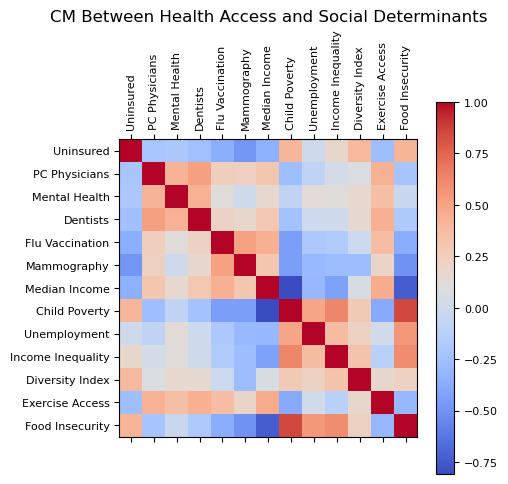

In [11]:
f = plt.figure(figsize=(12, 12))
plt.matshow(df_healthcare_predictors.corr(), cmap = "coolwarm")
plt.xticks(range(df_healthcare_predictors.shape[1]), df_healthcare_predictors.columns, fontsize=8, rotation=90)
plt.yticks(range(df_healthcare_predictors.shape[1]), df_healthcare_predictors.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('CM Between Health Access and Social Determinants', fontsize=12)
plt.show()


[Text(0.5, 0, 'Uninsured'),
 Text(1.5, 0, 'PC Physicians'),
 Text(2.5, 0, 'Mental Health'),
 Text(3.5, 0, 'Dentists'),
 Text(4.5, 0, 'Flu Vaccination'),
 Text(5.5, 0, 'Mammography'),
 Text(6.5, 0, 'Median Income'),
 Text(7.5, 0, 'Child Poverty'),
 Text(8.5, 0, 'Unemployment'),
 Text(9.5, 0, 'Income Inequality'),
 Text(10.5, 0, 'Diversity Index'),
 Text(11.5, 0, 'Exercise Access'),
 Text(12.5, 0, 'Food Insecurity')]

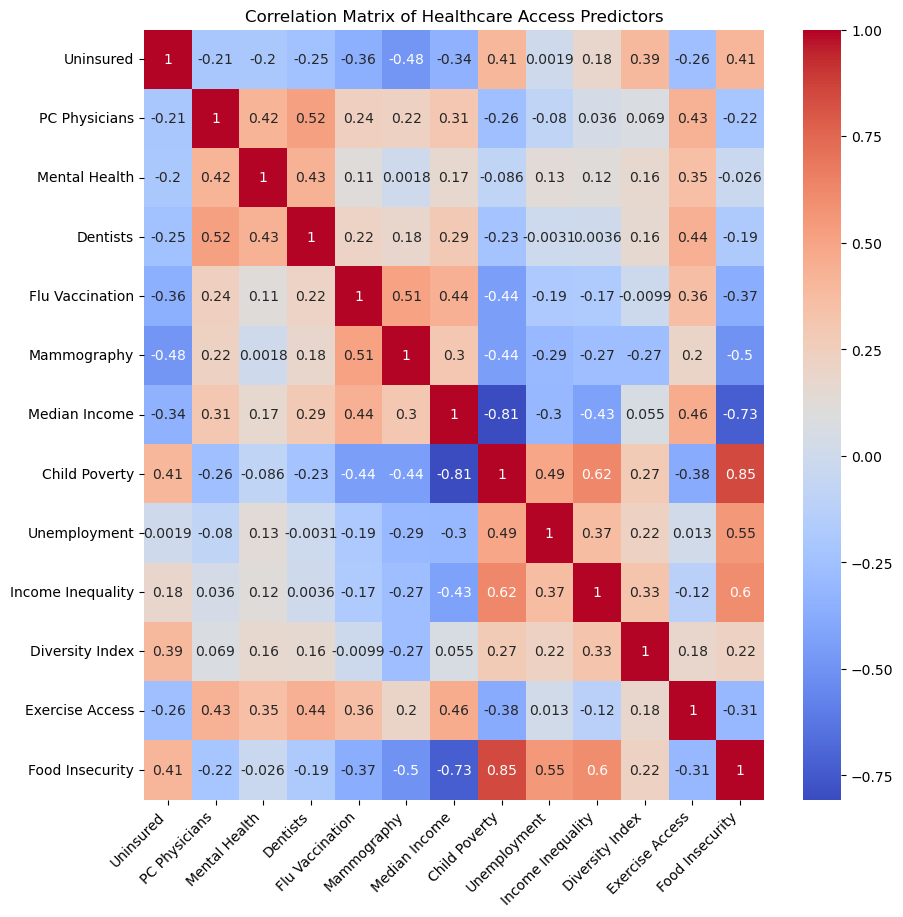

In [12]:
# Create a correlation heatmap using seaborn

corr_matrix =  df_healthcare_predictors.corr()
f,ax = plt.subplots(figsize = (10, 10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
sns.heatmap(corr_matrix, annot = True, ax = ax, cmap = "coolwarm")
ax.set_title("Correlation Matrix of Healthcare Access Predictors", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [13]:
import numpy as np

# Get upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten and drop NaNs to get valid correlation pairs only
valid_corrs = upper_triangle.stack()

# Get median of all valid correlations
median_corr = valid_corrs.median()
print("Median correlation (excluding self-correlations):", median_corr)


Median correlation (excluding self-correlations): 0.09187587971772776


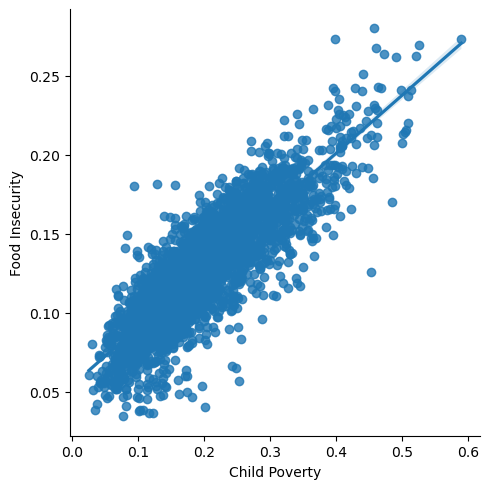

In [14]:
# Step 4: Creating scatterplots for the strongest correlated variable pairs, 
# and examining the nature of their relationships.

# Based on the heatmap the strongest correlation is between Child poverty and Food Insecurity (A)
sns.lmplot( x = "Child Poverty", y = "Food Insecurity", data = df_healthcare_predictors)


In [15]:
# Step 5: Adding markdown to discuss correlation coefficients and 
# interpretations of the scatterplots.

The strongest positive correlation is between child poverty and food insecurity (85%), showing that counties with higher rates of child poverty tend to also experience significantly higher levels of food insecurity.

In [17]:
# Step 7: Adding markdown to comment on distributions and highlight variables 
# worth deeper exploration, with justification.

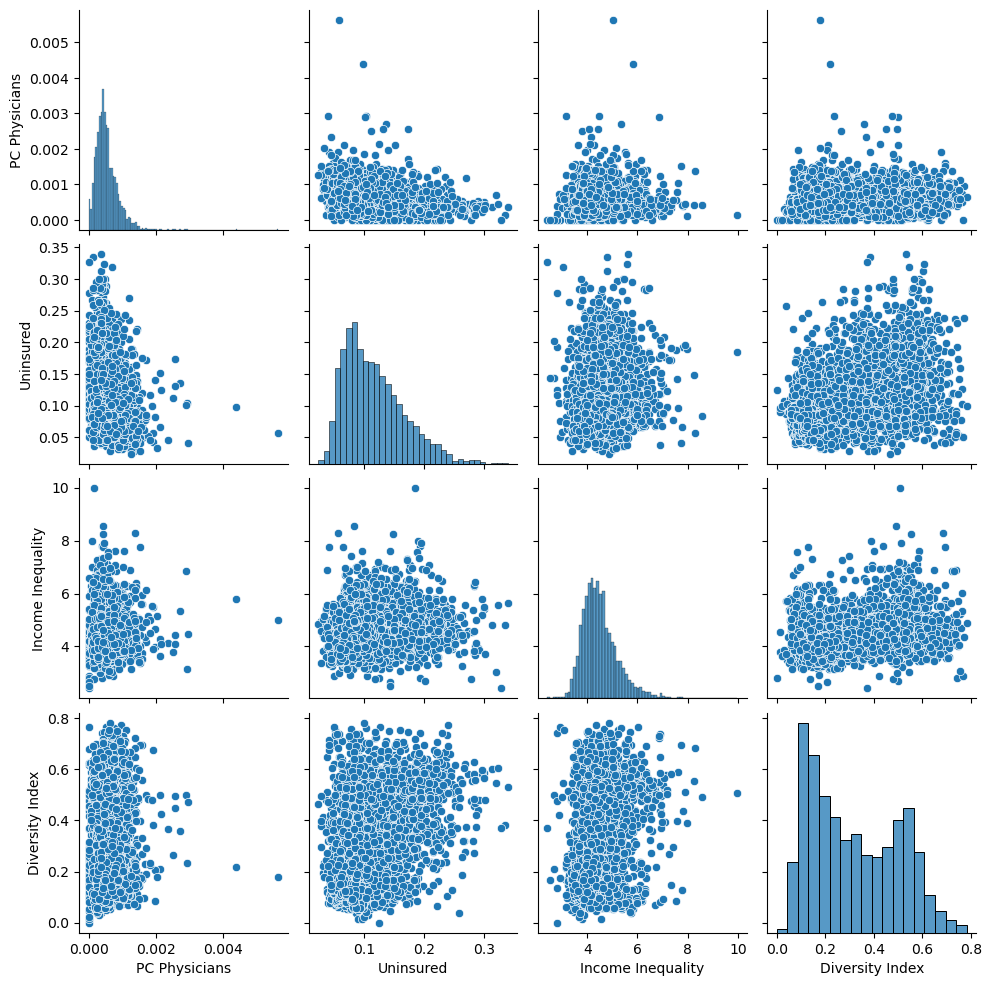

In [18]:
# Step 6: Creating a pair plot of the entire dataset 
# to inspect distributions and relationships.

subset_df_healthcare_predictor = df_healthcare_predictors[['PC Physicians', 'Uninsured', 'Income Inequality', 'Diversity Index']]


g = sns.pairplot(subset_df_healthcare_predictor) # as 

Due to high number of variables only 4 variables are selected to generate a pair plots. 

Diagonally distubuted histograms shows the rate of variables in all counties:

Primary Care Physicians (Per Capita) - The distribution is heavily right-skewed, with most counties having very low physician availability, whereas a few counties have significantly higher per-capita physician rates.

Uninsured Rate—The distribution is mildly left-skewed, clustering between 10% and 20%. Most counties fall within this range, though some have much lower or higher uninsured populations.

Income Inequality shows a roughly normal distribution centered around values around 4, indicating that income inequality is relatively consistent across most counties, with few extreme outliers.

Diversity Index - The distribution is right-skewed, meaning most counties have relatively low diversity. Higher diversity is concentrated in smaller counties.


Based on all six sets of scatterplots, it is hard to determine positive correlation distinctively visually, but we may see patterns of mostly weak correlations. Meanwhile, we can say that there is no negative correlation. 


In [20]:
# Step 8: Creating a categorical plot and interpret the results.

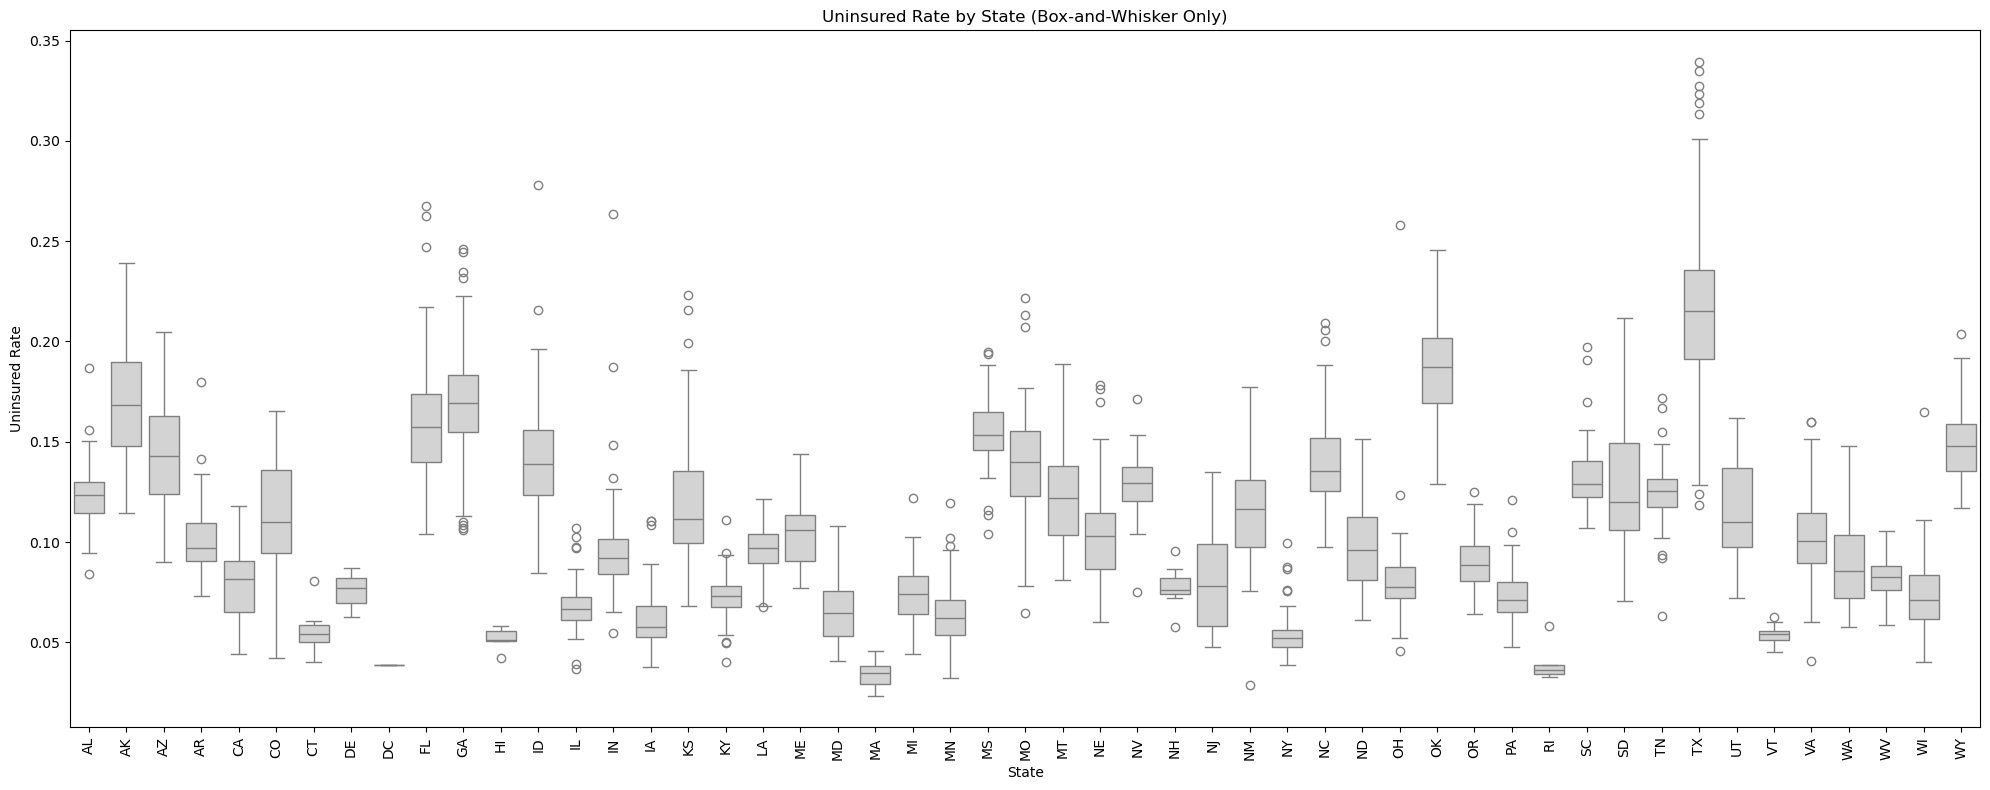

In [21]:
plt.figure(figsize=(20, 8))

# Boxplot for uninsured rate by state
sns.boxplot(
    x="State",
    y="uninsured_raw_value__uninsured_mean",
    data=df,
    color="lightgray"
)

plt.xticks(rotation=90)
plt.title("Uninsured Rate by State (Box-and-Whisker Only)")
plt.xlabel("State")
plt.ylabel("Uninsured Rate")
plt.tight_layout()
plt.show()


This is a categorical plot showing the Uninsured population rate across U.S. states, utilizing a combination of box and whiskers plots to capture both distribution and trend.

🔹 High Coverage States (Low Uninsured Rates)

Massachusetts (MA) and District of Columbia (DC) show consistently low uninsured rates with minimal variation across counties.

Reflects strong healthcare policies and broad insurance coverage.

🔹 High Uninsured States

Texas (TX), Georgia (GA), and Florida (FL) exhibit high median uninsured rates along with large variation between counties.

Highlights disparities in healthcare access and potential policy gaps.

🔹 Most States Cluster Between 10%–15%

The central trend line reveals that most states fall within a moderate range of uninsured rates.

Represents typical national variation.

🔹 Additional Insights

The plot reveals outliers (counties with extreme rates), median trends, and interquartile ranges, offering a detailed view of within-state variability.

In [23]:
# Step 9: Revisiting original research questions and writing answers 
# based on findings; adding new questions if necessary.

In [24]:
# Step X: Check for multicollinearity using Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numeric columns (predictors)
X = df_healthcare_predictors.select_dtypes(include='number')

# Add a constant (intercept) to the model — required for VIF calculation
X = add_constant(X)

# Create a DataFrame to store VIF values
vif = pd.DataFrame()
vif["Feature"] = X.columns  # Feature names
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # VIF scores

# Print VIF results
print(vif)


              Feature         VIF
0               const  302.073660
1           Uninsured    2.055177
2       PC Physicians    1.643038
3       Mental Health    1.442430
4            Dentists    1.641846
5     Flu Vaccination    1.685557
6         Mammography    1.925713
7       Median Income    4.298857
8       Child Poverty    6.919836
9        Unemployment    1.795144
10  Income Inequality    1.958973
11    Diversity Index    1.999460
12    Exercise Access    1.707269
13    Food Insecurity    4.995891


Can We Predict Healthcare Access Based on Selected Variables?
This summary is based on pair plots and a correlation heatmap using selected variables: median income, child poverty rates, and diversity index.

Pair Plot Review:
Primary Care Physicians vs. Diversity Index and Income Inequality: No clear pattern.
Uninsured Rate vs. Diversity Index and Income Inequality: Weak or no visible relationship.
Most scatterplots show broad, flat distributions, suggesting little predictive strength.

Correlation Heatmap:
Median correlation is under 10%, confirming weak linear relationships among the selected variables.
No variable pair showed strong enough correlation to suggest predictive reliability.

Exception:
A strong positive correlation (≈85%) was observed between child poverty and food insecurity — but these are more social determinants than direct healthcare access indicators.

Conclusion:
While child poverty and food insecurity are firmly linked, variables like diversity index, income inequality, and median income do not correlate strongly with direct healthcare access measures (e.g., uninsured rate or physician availability). Thus, predictive modeling would likely require more targeted or domain-specific variables.

Suggestion for future consideration:
The variables were also tested against multicollinearity, suggesting that child poverty might overlap regarding food insecurity or median income. 
Also, although all health-related variables don't show significant (under 2) VIF, combining them into one index might be helpful. 

In [26]:
# Step 10: Defining hypotheses that emerge from the visual exploration 
# to guide future statistical analysis.

Sub hypothesis:
Based on the correlation heatmap, pair plots, and boxplots, the following hypotheses can be formulated:
H1: States with higher median household income have lower uninsured rates.
H2: Higher access to primary care physicians is associated with lower uninsured rates.
H3: States with higher diversity index values tend to have higher uninsured rates.
H4: Child poverty rate is positively associated with food insecurity.
H5: Mental health provider access is higher in states with lower unemployment.
These hypotheses will be tested using statistical methods such as correlation significance tests, regression modeling, and group comparisons.

Main hypothesis:
H₀ (Null Hypothesis):
Median income, child poverty rates, and population characteristics (e.g., diversity index) have no statistically significant relationship with healthcare access.
H₁ (Alternative Hypothesis):
Median income, child poverty rates, and population characteristics (e.g., diversity index) are statistically significant predictors of healthcare access.

In [29]:
df.columns

Index(['FIPS', 'State', 'County', 'air_pollution__air_pollution_2020',
       'air_pollution__air_pollution_2021',
       'air_pollution__air_pollution_2022',
       'air_pollution__air_pollution_2023',
       'air_pollution__air_pollution_2024',
       'air_pollution__air_pollution_mean',
       'children_lunch__children_lunch_2020',
       ...
       'fmr_0_2022', 'fmr_1_2022', 'fmr_2_2022', 'fmr_3_2022', 'fmr_4_2022',
       'fmr_0_2024', 'fmr_1_2024', 'fmr_2_2024', 'fmr_3_2024', 'fmr_4_2024'],
      dtype='object', length=286)